In [ ]:
import pandas as pd
ctd_file = pd.read_csv('250309_CTD_data_with_units.dat',delimiter="\t")
ctd_dataframe = pd.DataFrame(ctd_file)
print(ctd_dataframe)

           Date   Time  Depth(m)  Temperature(c)  Salinity(psu)
0    11/29/2008  06:52         5           28.97          35.21
1    11/29/2008  06:52         6           28.98          35.21
2    11/29/2008  06:52         7           28.99          35.21
3    11/29/2008  06:52         8           28.96          35.21
4    11/29/2008  06:52         9           28.99          35.21
..          ...    ...       ...             ...            ...
991  11/29/2008  06:52       996            6.13          34.85
992  11/29/2008  06:52       997            6.13          34.85
993  11/29/2008  06:52       998            6.12          34.85
994  11/29/2008  06:52       999            6.12          34.85
995  11/29/2008  06:52      1000            6.11          34.85

[996 rows x 5 columns]


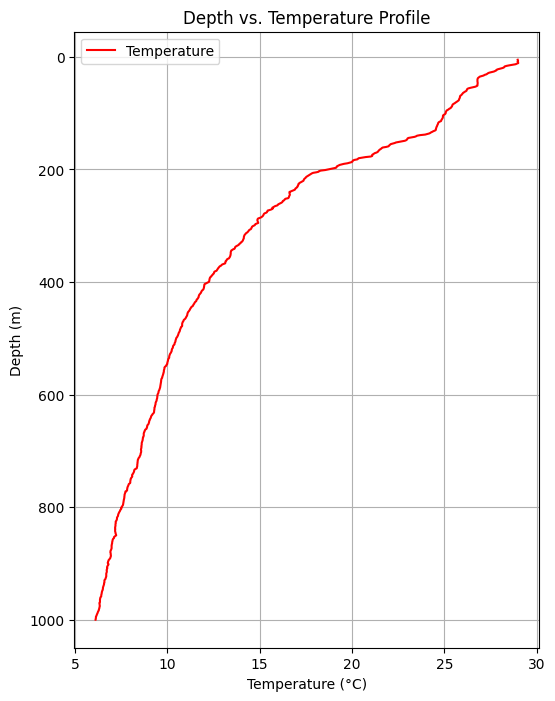

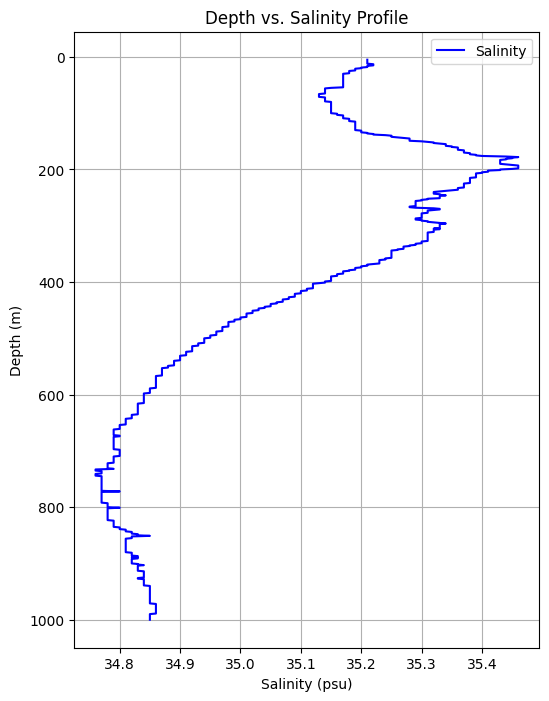

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt

# Depth vs. Temperature
plt.figure(figsize=(6,8))
plt.plot(ctd_dataframe["Temperature(c)"], ctd_dataframe["Depth(m)"], label="Temperature", color="red")
plt.gca().invert_yaxis()
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Depth vs. Temperature Profile")
plt.legend()
plt.grid()
plt.show()

# Depth vs. Salinity
plt.figure(figsize=(6,8))
plt.plot(ctd_dataframe["Salinity(psu)"], ctd_dataframe["Depth(m)"], label="Salinity", color="blue")
plt.gca().invert_yaxis()
plt.xlabel("Salinity (psu)")
plt.ylabel("Depth (m)")
plt.title("Depth vs. Salinity Profile")
plt.legend()
plt.grid()
plt.show()


                       id  TIME_GPS  LATITUDE N_S  LONGITUDE E_W  HUMIDITY  \
TIME_SERVER                                                                  
2017-06-28 17:10:00  1256  17:09:58  3428.595   S   1819.447   E      73.2   
2017-06-28 17:20:00  1257  17:19:58  3430.443   S   1820.241   E      65.2   
2017-06-28 17:30:00  1258  17:29:59  3432.261   S   1821.118   E      68.0   
2017-06-28 17:40:00  1259  17:40:02  3434.121   S   1821.882   E      68.0   
2017-06-28 17:50:00  1260  17:49:58  3435.981   S   1822.673   E      65.4   

                     BAROMETER  AIR_TEMPERATURE  WIND_SPEED_REL  \
TIME_SERVER                                                       
2017-06-28 17:10:00     1.0175             12.5             6.7   
2017-06-28 17:20:00     1.0174             12.7             6.3   
2017-06-28 17:30:00     1.0179             12.8             7.4   
2017-06-28 17:40:00     1.0180             12.8             7.4   
2017-06-28 17:50:00     1.0180             12.7    

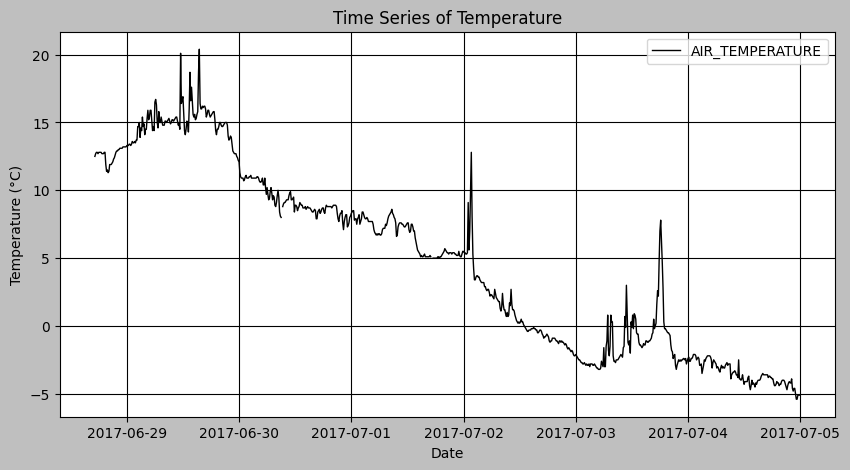

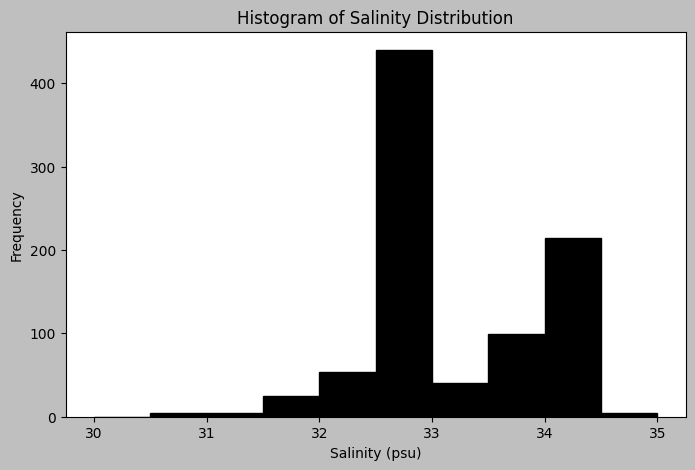

                           Values
Mean Temp (°C)           4.878271
Std Dev Temp (°C)        6.692847
IQR Temp (°C)                 NaN
Mean Salinity (psu)     33.110553
Std Dev Salinity (psu)   1.140150
IQR Salinity (psu)            NaN


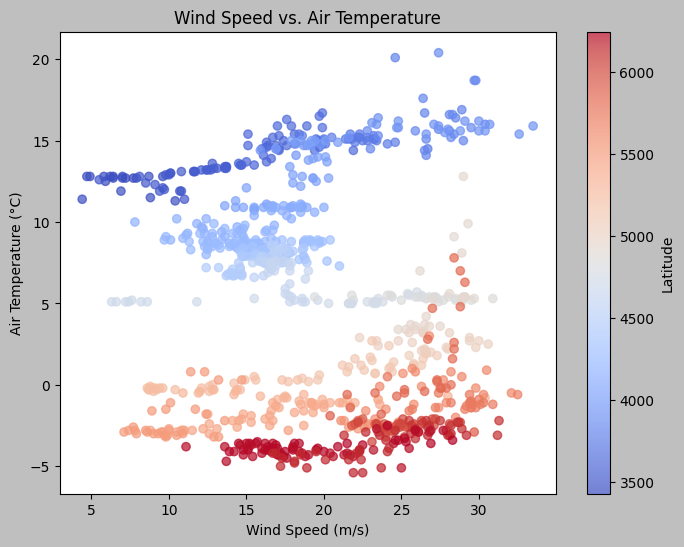

In [20]:
import pandas as pd

# Load the dataset
file_path = "SAA2_WC_2017_metocean_10min_avg.csv"
df = pd.read_csv(file_path, parse_dates=["TIME_SERVER"], index_col="TIME_SERVER")

# Display the first few rows
print(df.head())

# Missing values
print(df.isnull().sum())

# Select data from departure to July 4th (inclusive of July 4th!)
df_subset = df.loc[:'2017-07-04 23:59:59']

# Confirm the selection
print(df_selected.tail())

import matplotlib.pyplot as plt

# Use grayscale style
plt.style.use("grayscale")

# Figure
plt.figure(figsize=(10,5))
plt.plot(df_selected.index, df_selected["AIR_TEMPERATURE"], label="AIR_TEMPERATURE", linewidth=1)

# Formatting
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Time Series of Temperature")
plt.legend()
plt.grid()

# Save the figure/show
plt.savefig("temperature_timeseries.png", dpi=300)
plt.show()

import numpy as np

# Define bins from 30 to 35 with step 0.5
bins = np.arange(30, 35.5, 0.5)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_selected["TSG_SALINITY"], bins=bins, edgecolor="black")

# Axes formatting/labeling
plt.xlabel("Salinity (psu)")
plt.ylabel("Frequency")
plt.title("Histogram of Salinity Distribution")

# Figure show and save
plt.savefig("salinity_histogram.png", dpi=300)
plt.show()

from scipy.stats import iqr

# Stats calculations
stats = {
    "Mean Temp (°C)": df_selected["AIR_TEMPERATURE"].mean(),
    "Std Dev Temp (°C)": df_selected["AIR_TEMPERATURE"].std(),
    "IQR Temp (°C)": iqr(df_selected["AIR_TEMPERATURE"]),
    "Mean Salinity (psu)": df_selected["TSG_SALINITY"].mean(),
    "Std Dev Salinity (psu)": df_selected["TSG_SALINITY"].std(),
    "IQR Salinity (psu)": iqr(df_selected["TSG_SALINITY"])
}

# Convert to DataFrame for table format
stats_df = pd.DataFrame(stats, index=["Values"]).T
print(stats_df)

plt.figure(figsize=(8,6))

# Scatter plot with latitude as color
scatter = plt.scatter(df_selected["WIND_SPEED_TRUE"], df_selected["AIR_TEMPERATURE"],
                      c=df_selected["LATITUDE"], cmap="coolwarm", alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Latitude")

# Labels and title
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Air Temperature (°C)")
plt.title("Wind Speed vs. Air Temperature")

# Save figure
plt.savefig("wind_vs_temp.png", dpi=300)
plt.show()


